In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
portfolio = pd.read_json(r'C:\Desktop\portfolio.json', orient='records', lines=True)
profile = pd.read_json(r'C:\Desktop\profile.json', orient='records', lines=True)
transcript = pd.read_json(r'C:\Desktop\transcript.json', orient='records', lines=True)

In [3]:
df=pd.DataFrame(transcript['value'].values.tolist(),index=transcript.index)

In [4]:
transcript=transcript.merge(df,left_index=True, right_index=True)

In [5]:
#one hot encode channels
mlb = MultiLabelBinarizer()
channel = pd.DataFrame(mlb.fit_transform(portfolio['channels']),columns=mlb.classes_, index=portfolio.index)

In [6]:
portfolio=portfolio.merge(channel,left_index=True, right_index=True)

In [7]:
transcript=transcript.merge(portfolio, left_on='offer_id', right_on='id', how='left')

In [8]:
transcript=transcript.merge(profile, left_on='person', right_on='id', how='left')

In [9]:
transcript=transcript.merge(portfolio, left_on='offer id', right_on='id', how='left')

# email_response_rate

In [10]:
emails_completed=transcript[(transcript['event']=='offer completed') \
                        & (transcript['email_x']==1)]['event'].count()

emails_received=transcript[(transcript['event']=='offer received') & (transcript['offer_type_y']!='informational')\
& (transcript['email_y']==1)]['event'].count()

email_response_rate=round((emails_completed/emails_received*100),1)
email_response_rate

55.0

# mobile_response_rate

In [11]:
mobile_completed=transcript[(transcript['event']=='offer completed') \
                        & (transcript['mobile_x']==1)]['event'].count()
mobile_received=transcript[(transcript['event']=='offer received') & (transcript['offer_type_y']!='informational')\
& (transcript['mobile_y']==1)]['event'].count()
mobile_response_rate=round((mobile_completed/mobile_received*100),1)
mobile_response_rate

56.5

# web_response_rate

In [12]:
web_completed=transcript[(transcript['event']=='offer completed') \
                        & (transcript['web_x']==1)]['event'].count()
web_received=transcript[(transcript['event']=='offer received') & (transcript['offer_type_y']!='informational')\
& (transcript['web_y']==1)]['event'].count()
web_response_rate=round((web_completed/web_received*100),1)
web_response_rate

56.0

# social_response_rate

In [13]:
social_completed=transcript[(transcript['event']=='offer completed') \
                        & (transcript['social_x']==1)]['event'].count()
social_received=transcript[(transcript['event']=='offer received') & (transcript['offer_type_y']!='informational')\
& (transcript['social_y']==1)]['event'].count()
social_response_rate=round((social_completed/social_received*100),1)
social_response_rate

57.2

In [14]:
channel_response_rate={'email':email_response_rate, 
                      'mobile':mobile_response_rate,
                      'web':web_response_rate,
                      'social':social_response_rate}
channel_response_rate

{'email': 55.0, 'mobile': 56.5, 'web': 56.0, 'social': 57.2}

In [15]:
channel_response_rate_df=pd.DataFrame.from_dict(channel_response_rate,orient='index').reset_index()
channel_response_rate_df.columns =['channels','channel_response_rate']

In [16]:
channel_response_rate_df

,channels,channel_response_rate
0,email,55.0
1,mobile,56.5
2,web,56.0
3,social,57.2


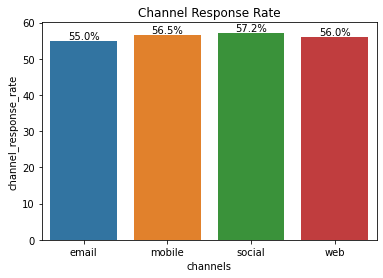

In [17]:
groupedvalues = channel_response_rate_df.groupby('channels').sum().reset_index()
ax=sns.barplot(data=groupedvalues, x="channels",  y="channel_response_rate",errwidth=0)
plt.title('Channel Response Rate')
ax.bar_label(ax.containers[0],fmt='%1.1f%%')
plt.show()

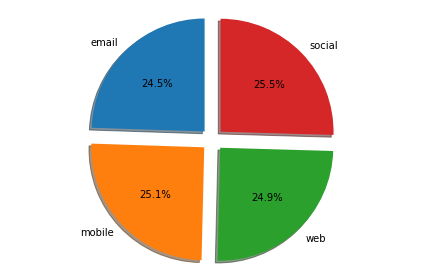

In [18]:
# Pie chart
labels = channel_response_rate_df['channels'].tolist()
sizes = channel_response_rate_df['channel_response_rate'].tolist()
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.1, 0.1, 0.1, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()